In [2]:
## Import abundance information of metagenome and single-cell, together
import numpy as np
import matplotlib.pyplot as plt

genome_id = [];#genome file
species_numerical_id = [];#genome numberical ID
metag_abundance = [];sag_tot = []
taxa = [];species=[]
with open('Data/mapping2.txt') as g:
    lines = g.readlines()
    for line in lines:
        tmp = line.split('\t')
        tmp1 = 'Data/'+tmp[0].split('.fasta')[0]+'.csv'
        filename = tmp1
        genome_id.append(tmp1)
        species_numerical_id.append(tmp[0].split('_')[0])
        taxa.append(tmp[1])
        species.append(tmp[2])
        with open(filename) as k:
            abundance = []
            klines = k.readlines()
            for kline in klines:
                if kline[0] == '0':
                    tmp = kline.split(',')
                    mab = (float(tmp[2])+float(tmp[3])+float(tmp[4])+float(tmp[5])+float(tmp[6])+float(tmp[7])+float(tmp[8]))/7
                    abundance.append(mab)
            metag_abundance.append(abundance)
totlen = len(genome_id)
metag_matrix = np.matrix(metag_abundance)
sag_matrix = np.zeros(metag_matrix.shape)

In [3]:
## Load information about the species ID of each SAG
import json
f = open('Data/cluster_cell_dictionary.json')
SAG_dictionary = json.load(f)

In [4]:
## Map SAG with time points; 7 time points total; correspond to metagenome time points
microbe_seq_sample_id = {}
microbe_seq_sample_id['14'] = 0
microbe_seq_sample_id['31'] = 1
microbe_seq_sample_id['32'] = 1
microbe_seq_sample_id['34'] = 1
microbe_seq_sample_id['8'] = 2
microbe_seq_sample_id['9'] = 2
microbe_seq_sample_id['5'] = 3
microbe_seq_sample_id['7'] = 3
microbe_seq_sample_id['15'] = 3
microbe_seq_sample_id['27'] = 3
microbe_seq_sample_id['10'] = 4
microbe_seq_sample_id['11'] = 5
microbe_seq_sample_id['12'] = 5
microbe_seq_sample_id['33'] = 6
microbe_seq_sample_id['35'] = 6

In [5]:
# Restruct the data to include timepoints
for species_id in SAG_dictionary:
    if species_id in species_numerical_id:
        index = species_numerical_id.index(species_id)
        for sag_collection in SAG_dictionary[species_id]:
            idlen = len(sag_collection)
            if idlen==7:
                smp = sag_collection[0:2]
            elif idlen==6:
                smp = sag_collection[0]
            else:
                print('dsfdasf')
            smp_order=microbe_seq_sample_id[smp] # time point
            sag_matrix[index,smp_order] = sag_matrix[index,smp_order]+1

In [6]:
#Compute average bias for each species
sag_matrix_sudo = sag_matrix 
metag_matrix_sudo = metag_matrix 
sag_matrix_norm = sag_matrix_sudo / sag_matrix_sudo.sum(axis=0)
metag_matrix_norm = metag_matrix_sudo / metag_matrix_sudo.sum(axis=0)

sag_bias = sag_matrix_norm.mean(axis=1)
sag_bias = sag_bias/sag_bias.sum()
metag_bias = metag_matrix_norm.mean(axis=1)
metag_bias = metag_bias/metag_bias.sum()
tot_bias = []
for i in range(0,totlen):
    tmp = float(sag_bias[i])/(metag_bias[i])
    tot_bias.append(np.log10(tmp[0,0]))
print(tot_bias)
tot_bias_reserve = tot_bias

[0.2697469027764715, 0.8712726237381963, 1.289617745130093, -0.140567162748918, 0.9638349350887943, 0.49882113857474425, 1.2780139926414014, 0.6958812071870674, 1.088738135091473, 0.05175103197012921, 0.9248848139568354, 0.17360383798798612, 0.2652115734664104, -0.551603001539991, 0.8983780889946301, inf, 0.40934243041086765, 0.3219244046526503, 1.236869148293548, 0.3016861602378306, -0.06368370689463365, 0.5238505020609874, 0.8329753462236353, 0.01298778543012651, 1.5457177773939563, 0.28889576913553494, -0.7377294216295043, -0.6878083995910256, 0.9533002648417505, 1.3571152373250241, -0.6463288387150408, 0.38294380172553616, 0.40995120729223467, 0.21288416759513196, -0.5003244245586551, 0.5623287189205903, 0.44827643875060963, 1.70324915019719, inf, 0.2725784585445284, 0.4176818830212429, -0.32532155497019694, -0.5939858018881654, -0.45210144215957215, 1.670118944378684, -0.3392602395339835, -0.02684507813307009, 0.6444606564482546, 0.6953463564120023, inf, 0.8989373764177614, -1.076

/var/folders/mz/29f7gp6x6fd13kzhdv7_kbcr0000gn/T/ipykernel_11056/914668996.py:13: RuntimeWarning: divide by zero encountered in true_divide
  tmp = float(sag_bias[i])/(metag_bias[i])


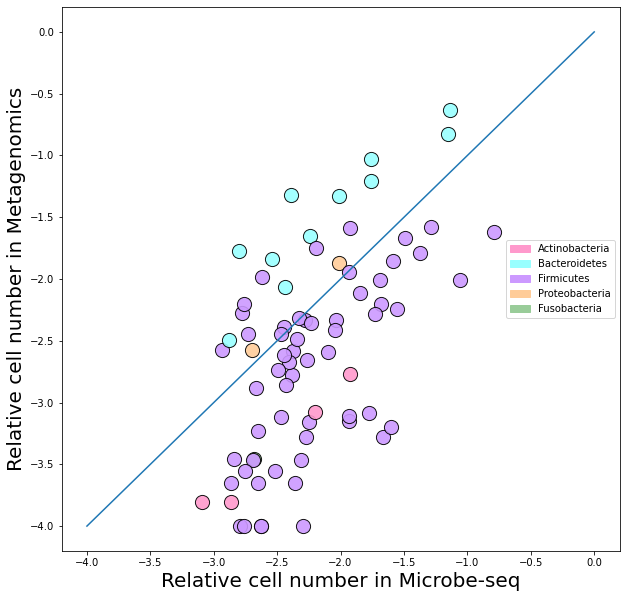

In [7]:
# Plot the bias between metagenome and single cell
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
colors = {}
colors['A'] = 'purple'
colors['B'] = 'dodgerblue'
colors['F'] = 'gold'
colors['P'] = 'green'
colors['FS'] = 'red'

colors['A'] = '#FF99CC'
colors['B'] = '#99FFFF'
colors['F'] = '#CC99FF'
colors['P'] = '#FFCC99'
colors['FS'] = '#99CC99'

markers = ["*" , "s" , "p" , "P" , "X" , "<", ">"]

fig, ax = plt.subplots(1, figsize=(10, 10))
# for i in range(0,7):
#     for j in range(0,totlen):
#         sag_ab = sag_matrix_norm[j,i]+0.0001
#         metag_ab = metag_matrix_norm[j,i]+0.0001
#         taxon = taxa[j]
#         x_values.append(math.log10(sag_ab))
#         y_values.append(math.log10(metag_ab))
#         plt.scatter(math.log10(sag_ab),math.log10(metag_ab),marker=markers[i],s=80, color=colors[taxon], alpha=0.5,edgecolors=None)

x_values=[]
y_values=[]
for i in range(0,totlen):
    sag_ab = sag_bias[i]+0.0001
    metag_ab = metag_bias[i]+0.0001
    taxon = taxa[i]
    plt.scatter(math.log10(sag_ab),math.log10(metag_ab),s=200, color=colors[taxon], alpha=0.9,edgecolors='black')
    x_values.append(math.log10(sag_ab))
    y_values.append(math.log10(metag_ab))
    
x = np.linspace(-4, 0, 100)
y = np.linspace(-4, 0, 100)
line1 = plt.plot(x, y)
plt.xlabel('Relative cell number in Microbe-seq',fontsize=20)
plt.ylabel('Relative cell number in Metagenomics',fontsize=20)

legend_elements = [Patch(facecolor=colors['A'], edgecolor=colors['A'],label='Actinobacteria'),
                   Patch(facecolor=colors['B'], edgecolor=colors['B'],label='Bacteroidetes'),
                   Patch(facecolor=colors['F'], edgecolor=colors['F'],label='Firmicutes'),
                   Patch(facecolor=colors['P'], edgecolor=colors['P'],label='Proteobacteria'),
                   Patch(facecolor=colors['FS'], edgecolor=colors['FS'],label='Fusobacteria')]
ax.legend(handles=legend_elements, loc='right')



In [8]:
## Plot for species-specific bias
sag_bias = sag_matrix_norm.mean(axis=1)
metag_bias = metag_matrix_norm.mean(axis=1)
tot_bias = []
for i in range(0,totlen):
    tmp = float(sag_bias[i]+0.0001)/(metag_bias[i]+0.0001)
    tot_bias.append(np.log10(tmp[0,0]))
print(tot_bias)
tot_bias_reserve = tot_bias
sort_index = np.argsort(tot_bias)

[0.2682995438611295, 0.8484638535797616, 1.1498777943595917, -0.139325883355484, 0.9044255046728161, 0.4871679519766574, 1.2154267531374674, 0.689746971164943, 1.0056749697560274, 0.05070941926534034, 0.8764184200776679, 0.17294254379891633, 0.26264828669365514, -0.5498031667989915, 0.7744656400330234, 1.704679110042102, 0.39710195533802617, 0.31960368607214, 1.1803837208951513, 0.2970013678434843, -0.06201403019709549, 0.5189702057683371, 0.8314362980263806, 0.012874855208067682, 1.2963534452123358, 0.28809712088313316, -0.735664796431566, -0.6842572792490345, 0.9493799240703312, 1.3038451566532159, -0.6321754916354595, 0.3762511742815865, 0.39373293396891784, 0.20637757974936655, -0.49992022842735384, 0.5562600546025002, 0.42762924092088656, 1.6135899690363047, 1.3757102004116566, 0.26300437637286767, 0.41602768830700404, -0.3249987069760531, -0.5882877312709461, -0.4476921364605774, 1.596557862623499, -0.3372608684851837, -0.026071810733266837, 0.5832292878666419, 0.6475397404027081

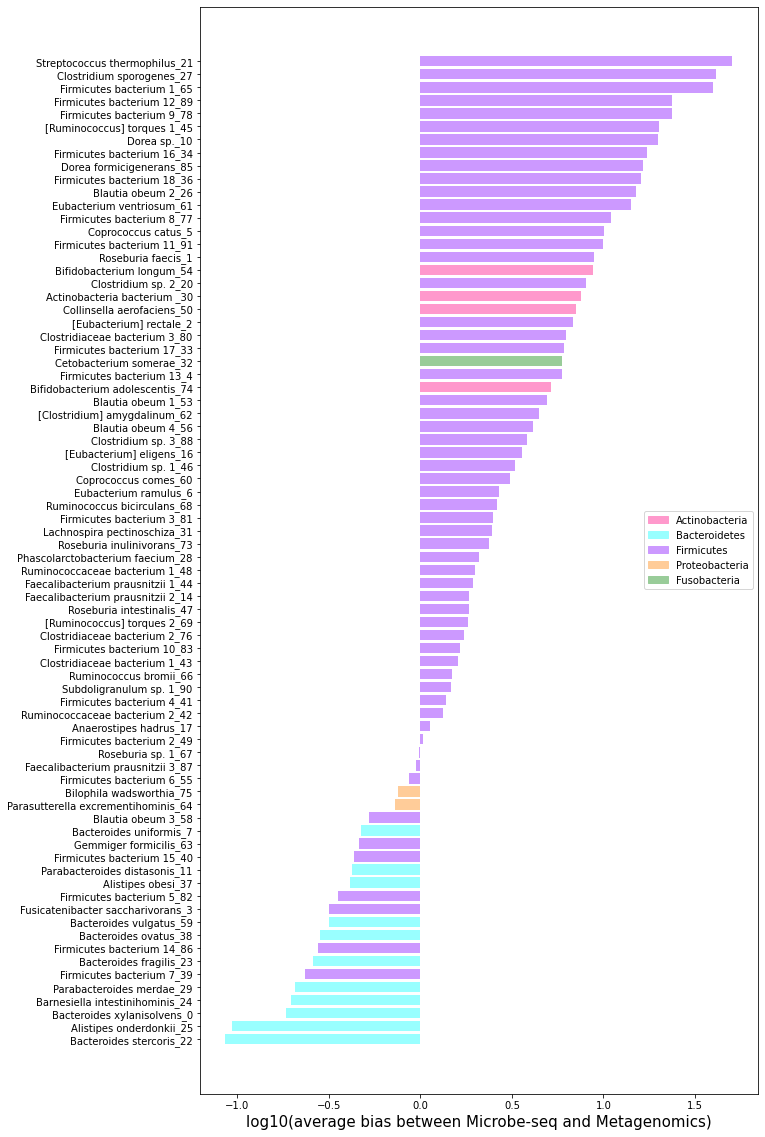

In [9]:
fig, ax = plt.subplots(1, figsize=(10, 20))

# Create the figure
colors['A'] = '#FF99CC'
colors['B'] = '#99FFFF'
colors['F'] = '#CC99FF'
colors['P'] = '#FFCC99'
colors['FS'] = '#99CC99'
legend_elements = [Patch(facecolor=colors['A'], edgecolor=colors['A'],label='Actinobacteria'),
                   Patch(facecolor=colors['B'], edgecolor=colors['B'],label='Bacteroidetes'),
                   Patch(facecolor=colors['F'], edgecolor=colors['F'],label='Firmicutes'),
                   Patch(facecolor=colors['P'], edgecolor=colors['P'],label='Proteobacteria'),
                   Patch(facecolor=colors['FS'], edgecolor=colors['FS'],label='Fusobacteria')]
ax.legend(handles=legend_elements, loc='right')




for j in range(0,totlen):
    i = sort_index[j]
    taxon = taxa[i]
    ax.barh(species[i]+'_'+species_numerical_id[i],tot_bias_reserve[i],color=colors[taxon])
plt.xlabel('log10(average bias between Microbe-seq and Metagenomics)',fontsize=15)


plt.show()